# ISUP 3 : Machine learning

*stolen from Maxime Sangnier*

# JAFUNO Douba





## Spectral clustering and agglomerative approaches

In [1]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

### Spectral clustering

Draw a random sample of size 100 from the [moons](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) distribution with noise set to $0.05$.

We consider [spectral clustering](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html#sklearn.cluster.SpectralClustering) with two clusters and a Gaussian kernel.
Cluster the sample with various values of the kernel parameter $\gamma \in \{10^{-3}, 10^{-2}, \dots, 10^3\}$ and display the results on subplots (use different colors for the two clusters).

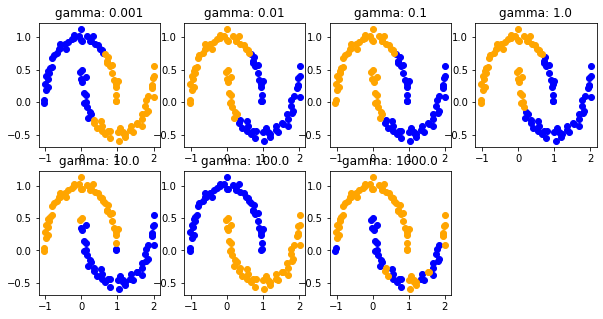

In [2]:
from sklearn.datasets import make_moons
X,y=make_moons(n_samples=100,noise=0.05)

from sklearn.cluster import SpectralClustering

gamma=np.logspace(-3,3,num=7)
plt.figure(figsize=(10,5))
for it,gam in enumerate(gamma):
    sC=SpectralClustering(n_clusters=2,gamma=gam,affinity="rbf")
    pred=sC.fit_predict(X)
    plt.subplot(2,4,it+1)
    plt.scatter(X[pred==0,0],X[pred==0,1],color="blue")
    plt.scatter(X[pred==1,0],X[pred==1,1],color="orange")
    plt.title("gamma: "+str(gam))

What is the best value for $\gamma$?
Compare it to the noise variance.

100

Do the same with a nearest neighbors affinity matrix and with the number of neighbors in $\{2, 4, \dots, 18\}$.

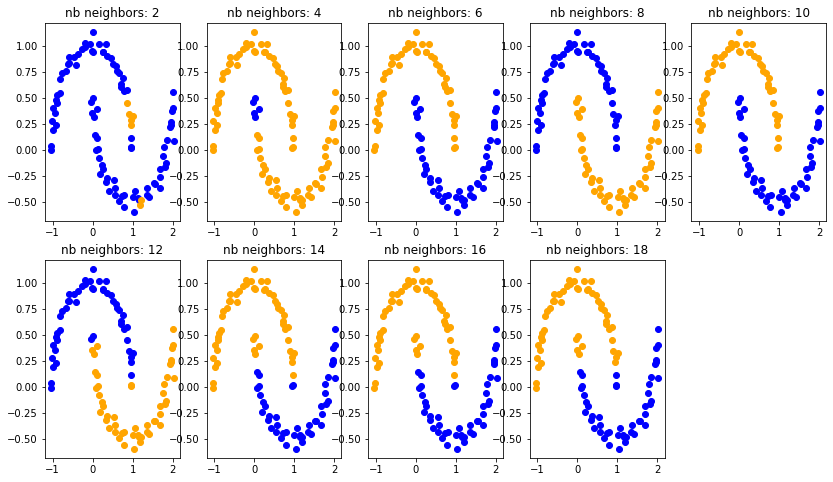

In [3]:
neighbors=np.arange(2,19,step=2)
plt.figure(figsize=(14,8))
for it,neigh in enumerate(neighbors):
    sC=SpectralClustering(n_clusters=2,affinity="nearest_neighbors",n_neighbors=neigh)
    pred=sC.fit_predict(X)
    plt.subplot(2,5,it+1)
    plt.scatter(X[pred==0,0],X[pred==0,1],color="blue")
    plt.scatter(X[pred==1,0],X[pred==1,1],color="orange")
    plt.title("nb neighbors: "+str(neigh))

Now, we focus on clustering (based on the colors) a part of [Kandinsky's painture](www.lsta.upmc.fr/sangnier/files/5MS101/img/cercles.jpg), called *several circles*.
For this purpose, the following script loads the image and extract the subpart of interest in the data matrix X.

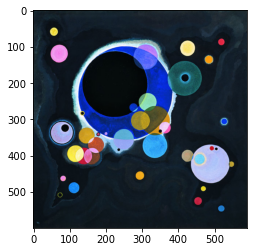

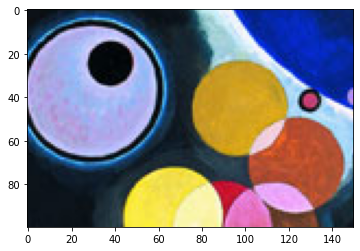

In [4]:
# Image is at www.lsta.upmc.fr/sangnier/files/5MS101/img/cercles.jpg
im = plt.imread("cercles.jpg")

plt.figure()
plt.imshow(im)

plt.figure()
plt.imshow(im[300:400, 50:200])

In [5]:
X = np.reshape(im[300:400, 50:200], (-1, 3))
print(X.shape)

(15000, 3)


Apply [spectral clustering](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html#sklearn.cluster.SpectralClustering) with a 15-nearest neighbors affinity matrix and 10 clusters.
Show the image resulting from the clustering with the colormap *jet*.

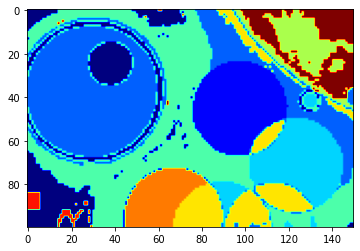

In [6]:
#Answer 
clt = SpectralClustering(n_clusters=10, affinity="nearest_neighbors", n_neighbors=15)
y_pred = clt.fit_predict(X)

Y = np.reshape(y_pred, (100, 150))
plt.imshow(Y, cmap="jet")

### Agglomerative clustering

Here, we aim at comparing the four common linkage methods provided for agglomerative clustering:
1. single linkage;
1. complete linkage;
1. average linkage;
1. Ward's method.

With the help of the following functions, draw a sample of size 200 of rectangle clusters and plot it.

In [7]:
def make_rect(center=[0, 0], width=2, size=1):
    """Random points in a square.
    """
    X = (np.random.rand(size, 2) + np.asarray(center) - np.r_[0.5, 0.5])
    X[:, 0] *= width
    return X

def make_clusters(size=1, width=4):
    """Random points in 2 close rectangles.
    """
    ind = np.sort(np.random.randint(0, high=size, size=1))[0]
    sizes = [ind, size-1-ind]
    centers = [[0, 1], [0, -1]]
    return np.concatenate([make_rect(c, size=s, width=width) for c, s in zip(centers, sizes)])


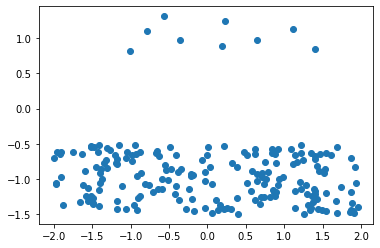

In [8]:
#Answer
X = make_clusters(size=200)

plt.scatter(X[:, 0], X[:, 1])

For the purpose of the comparison (single linkage does not exist in scikit-learn), we consider the following object for agglomerative clustering.

Apply agglomerative clustering with single linkage and 2 clusters to the previously drawn sample and plot the results (use two different colors for the two clusters).

In [9]:
from scipy.cluster.hierarchy import linkage, fclusterdata

class AggClustering(object):
    def __init__(self, n_clusters=2, linkage='single'):
        """Agglomerative Clustering
        
        Parameters:
            n_clusters : int, default=2
            linkage : {"single, “complete”, “average”, “ward”}, optional, default: “single”
        """
        self.n_clusters = n_clusters
        self.linkage = linkage
        
    def fit_predict(self, X):
        return fclusterdata(X, self.n_clusters, criterion="maxclust",
                            method=self.linkage) - 1

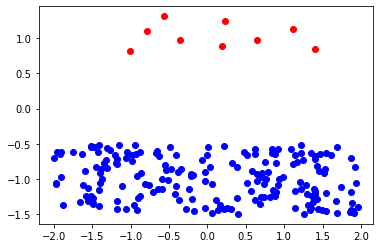

In [10]:
#Answer
clt = AggClustering()
y = clt.fit_predict(X)

plt.scatter(X[y==0, 0], X[y==0, 1], c="b")
plt.scatter(X[y==1, 0], X[y==1, 1], c="r")

We want to compare the resulting clustering for:
- different number of clusters;
- the four linkage methods.

Complete the following functions, that is aimed to do so, and apply it to the dataset.
It should display the resulting clustering for the four linkage methods and for 4, then 2, clusters.

In [11]:
def compare_agg(X, Clt=AggClustering, n_clusters=[2], methods=["single"], figsize=(15, 2)):
    colors = "brmc"*(np.max(n_clusters)//4 + 1)
    
    for k in n_clusters:
        plt.figure(figsize=figsize)
        for it, method in enumerate(methods):
            clt = AggClustering(linkage=method,n_clusters=k)
            y = clt.fit_predict(X)

            plt.subplot(1, len(methods), it+1)
            for classe_id in range(k):
                plt.scatter(X[y==classe_id,0],X[y==classe_id,1],color=colors[classe_id])
            plt.title(method)

In [12]:
# Answer 
def compare_agg(X, Clt=AggClustering, n_clusters=[2], methods=["single"], figsize=(15, 2)):
    colors = "brmc"*(np.max(n_clusters)//4 + 1)
    
    for k in n_clusters:
        plt.figure(figsize=figsize)
        for it, method in enumerate(methods):
            clt = Clt(n_clusters=k, linkage=method)
            y = clt.fit_predict(X)

            plt.subplot(1, len(methods), it+1)
            for classe_id in range(k):
                plt.scatter(X[y==classe_id, 0], X[y==classe_id, 1], c=colors[classe_id])
            plt.title(method)

Analyze the results for each method.
Which one produces the "expected" clustering?

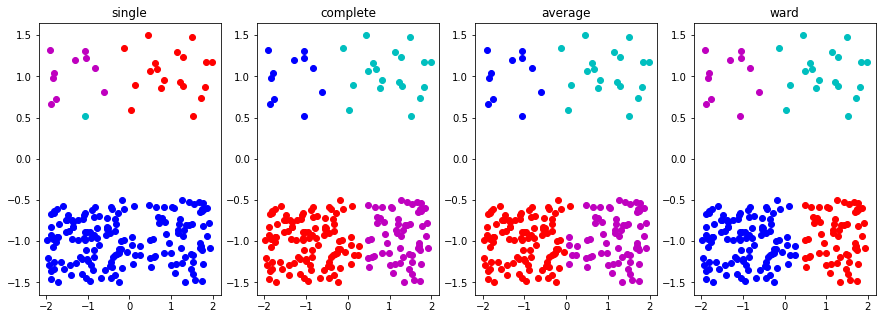

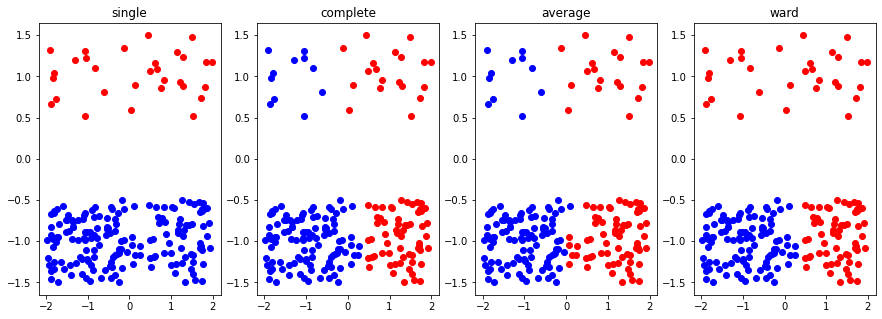

In [13]:
X = make_clusters(size=200)
compare_agg(X, AggClustering, n_clusters=[4, 2],
            methods=["single", "complete", "average", "ward"], figsize=(15, 5))

Do the same experiment and analysis for a single rectangle dataset.
Overall, which methods are perferable?

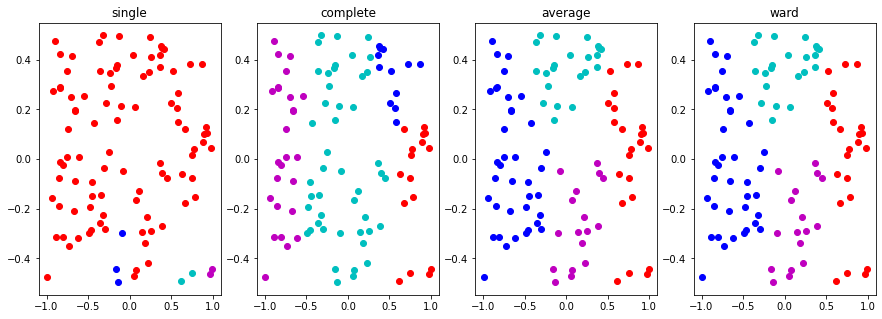

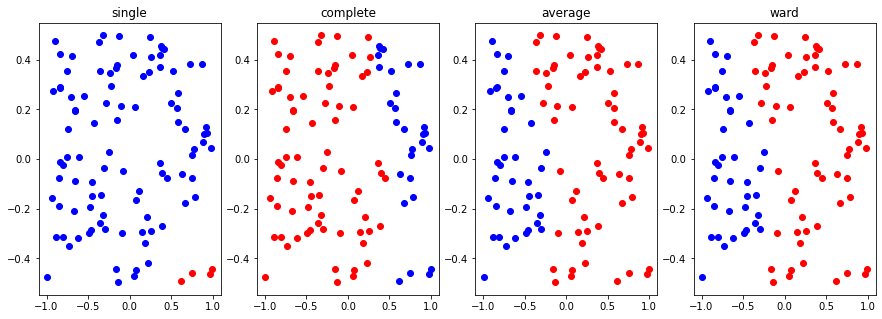

In [14]:
X = make_rect(size=100) #on utilise make_rect et non plus make_clusters

compare_agg(X, AggClustering, n_clusters=[4, 2],
            methods=["single", "complete", "average", "ward"], figsize=(15, 5))

Using the functions from the previous practical session, sample 200 points from a Gaussian mixture model with 3 modes.

Use the [agglomerative clustering](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) class from scikit-learn to compare complete, average and Ward's method with 4, then 3, clusters.

Was the results expected?

In [15]:
def covariance(sigma1=1., sigma2=1., theta=0.):
    """
        Covariance matrix with eigenvalues sigma1 and sigma2, rotated by the angle theta.
    """
    rotation = np.array([[np.cos(theta), -np.sin(theta)],
                        [np.sin(theta), np.cos(theta)]])
    cov = np.array([[sigma1, 0.],
                   [0, sigma2]])
    return rotation.dot(cov.dot(rotation.T))

def sample_gm(weights, means, covariances, size=1):
    """Sample points from a Gaussian mixture model specified by the weights, the means
    and the covariances. These three parameters are lists."""
    X = None
    p = np.random.multinomial(1, weights, size=size)
    for (m, c, i) in zip(means, covariances, p.T):
        Y = np.random.multivariate_normal(m, c, size=size)
        if X is None:
            X = Y.copy()
        else:
            X[i==1] = Y[i==1]
    return X

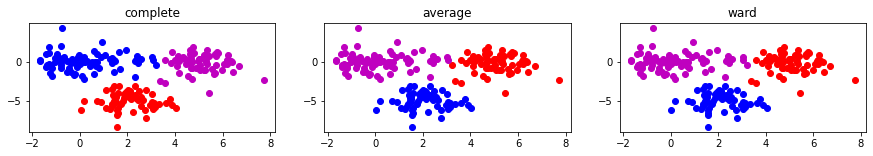

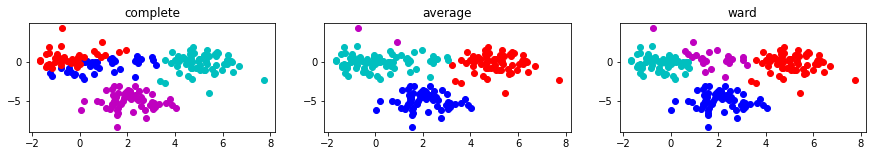

In [16]:
sig1=covariance()
X=sample_gm([0.33,0.33,0.34],[[0,0],[5,0],[2,-5]],[sig1,sig1,sig1],size=200)
compare_agg(X,n_clusters=[3,4],methods=['complete', 'average', 'ward'])